In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Importing CSV files into Pandas
subject_i = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\subject-info.csv")
test_m = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\test_measure.csv")
subject_copy = subject_i.copy()
test_copy = test_m.copy()

In [225]:
print(test_copy.shape)
print(subject_copy.shape)
#print(test_m.describe())
print(subject_i.describe())
print(subject_i.isna().sum())
print(test_m.isna().sum())

(575087, 9)
(992, 8)
              Age      Weight      Height    Humidity  Temperature  \
count  992.000000  992.000000  992.000000  962.000000   962.000000   
mean    28.979133   73.383367  174.913508   48.211435    22.818565   
std     10.076653   12.005361    7.950027    8.560991     2.784066   
min     10.800000   41.000000  150.000000   23.700000    15.000000   
25%     21.100000   66.000000  170.000000   42.000000    20.800000   
50%     27.100000   73.000000  175.000000   47.000000    22.900000   
75%     36.325000   80.225000  180.000000   54.000000    24.400000   
max     63.000000  135.000000  203.000000   69.000000    32.300000   

              Sex          ID  
count  992.000000  992.000000  
mean     0.150202  424.890121  
std      0.357449  243.832478  
min      0.000000    1.000000  
25%      0.000000  214.750000  
50%      0.000000  428.500000  
75%      0.000000  626.250000  
max      1.000000  857.000000  
Age             0
Weight          0
Height          0
Humidi

#### 17.Display a histogram showing the distribution of athletes by their BMI values.

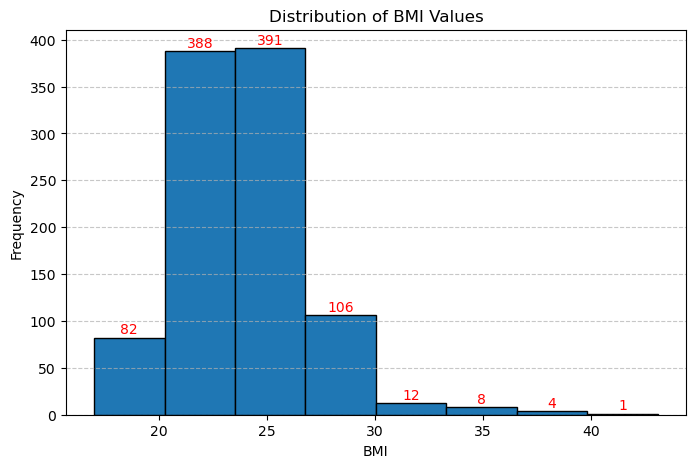

In [227]:
#Calculating the BMI values
subject_i['BMI'] = round(subject_i['Weight'] / ((subject_i['Height'] /100) **2),1)
#print(subject_i['BMI'])

#histogram plot for BMI distribution
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(subject_i['BMI'], bins=8, edgecolor='black')
#print("Bin edges:", bins)
#print("Frequencies:", counts)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar with the count on top
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X-position (center of bar)
        height + 1,                             # Y-position (slightly above bar)
        int(count),                             # Text (count value)
        ha='center', va='bottom', fontsize=10, color='RED'  # Label alignment, fontsize and its color
            )

plt.show()

#### 18. " Who is the tallest participant in the dataset? What is  his/her Vo2 kg/ml?"

In [229]:
# Merge the two DataFrames on 'ID'
combined_df = pd.merge(subject_i, test_m, on='ID')

# Find the tallest person
tallest_person = combined_df[combined_df['Height'] == combined_df['Height'].max()]
print(f"ID of the Tallest Person in the Dataset is: {tallest_person['ID'].values[0]}")

# Calculate peak VO2 per kg
max_vo2 = tallest_person['VO2'].max()
vo2_kg_ml = max_vo2 / tallest_person['Weight'].iloc[0]
print("Peak VO₂ (mL/kg/min):", round(vo2_kg_ml, 2))



ID of the Tallest Person in the Dataset is: 94
Peak VO₂ (mL/kg/min): 46.86


#### 19."What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate."

In [231]:
# Find the maximum heart rate value from the test data
print("Highest Heart Rate:")
print(test_m['HR'].max())

# Filter the combined DataFrame to get the row(s) with the highest heart rate
Highest_HR = combined_df[combined_df['HR'] == combined_df['HR'].max()]

# Display ID, Sex, and HR of the person(s) with the highest heart rate
print("ID, Sex, and Heart Rate of the individual(s) with the highest HR:")
print(Highest_HR[['ID', 'Sex', 'HR']])


Highest Heart Rate:
226.0
ID, Sex, and Heart Rate of the individual(s) with the highest HR:
         ID  Sex     HR
670156  619    0  226.0


#### 20.What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [233]:
# Filter only male athletes
male_athletes = subject_i[subject_i['Sex'] == 0]

# Find the shortest height among male athletes
shortest_height = male_athletes['Height'].min()

# Get the male athlete with that shortest height
shortest_male = male_athletes[male_athletes['Height'] == shortest_height]

# Get the ID of the shortest male
shortest_male_id = shortest_male['ID'].values[0]

# Find all test records for that ID
shortest_male_tests = test_m[test_m['ID'] == shortest_male_id]

# Find the max VO2 from their test data
max_vo2 = shortest_male_tests['VO2'].max()

# Get their weight from subject_i
weight_kg = shortest_male['Weight'].values[0]

# Calculate VO2 max in mL/kg/min
vo2_max_per_kg = max_vo2 / weight_kg

# Print result
print(f"Shortest Male Athlete ID: {shortest_male_id}")
print(f"Height: {shortest_height} cm")
print(f"Weight: {weight_kg} kg")
print(f"VO₂ max: {round(vo2_max_per_kg, 2)} mL/kg/min")




Shortest Male Athlete ID: 367
Height: 159.0 cm
Weight: 66.0 kg
VO₂ max: 49.62 mL/kg/min


#### 21."Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.
#### Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ?
#### Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)"